In [1]:
import numpy as np
import matplotlib.pyplot as plt
from scipy import integrate

from scipy.special import jv
from scipy.special import yv
from scipy.optimize import root

$$(i) \frac{\partial s}{\partial t} = k\frac{\partial^2 s}{\partial x^2} +\frac{Q}{A}\frac{\partial s}{\partial x}$$

$$(ii) \frac{\partial \zeta}{\partial t} = \kappa \frac{\partial^2 \zeta}{\partial r^2} + \frac{1}{r} \left (\kappa-\frac{Q}{\pi} \right )\frac{\partial \zeta}{\partial r}$$

In [2]:
Q = 150  # m/s^3
A = 2000 # m^2
k = 400
kappa = k
R = 10000
L = 10000

D = 1

pi = np.pi

a = A/(pi*D)

In [3]:
def ssx(x):
    pwr = Q/(kappa*pi*D)
    d1 = 1/(R**pwr -a**pwr*np.exp(-Q*L/(k*A)))
    c1 = d1*a**pwr
    c2 = -np.exp(-Q*L/(k*A))*c1
    return c1 * np.exp(-Q*x/(k*A)) + c2

def ssr(r):
    pwr = Q/(kappa*pi*D)
    d1 = 1/(R**pwr -a**pwr*np.exp(-Q*L/(k*A)))
    d2 = 1-d1*R**pwr
    return d1*r**pwr + d2

def ssx0(x):
    pwr = 2*Q/(kappa*pi*D)
    d1 = 1/(R**pwr -a**pwr*np.exp(-2*Q*L/(k*A)))
    c1 = d1*a**pwr
    c2 = -np.exp(-2*Q*L/(k*A))*c1
    return c1 * np.exp(-2*Q*x/(k*A)) + c2

def ssr0(r):
    pwr = 2*Q/(kappa*pi*D)
    d1 = 1/(R**pwr -a**pwr*np.exp(-2*Q*L/(k*A)))
    d2 = 1-d1*R**pwr
    return d1*r**pwr + d2

### Finding eigenfunctions and -values

In [4]:
order = Q/(2*kappa*pi)


def phi_r(r,par):
    return (r)**(order)*jv(order, np.sqrt(par[0]/kappa)*(r)) + par[1]*(r)**(order)*yv(order, np.sqrt(par[0]/kappa)*(r))

def phi_x(x,par):
    w = np.sqrt(4*k*par[0] - (Q/A)**2)
    return np.exp(-Q*x/(2*k*A))*(np.sin(w*x) + par[1]*np.cos(w*x))

def phi_x_prime(x,par):
    a = -Q/(2*k*A)
    w = np.sqrt(4*k*par[0] - (Q/A)**2)
    return np.exp(a*x)*(np.sin(w*x)*(a-par[1]*w) + np.cos(w*x)*(a*par[1]+w)) 

def phi_r_prime(r,par):
    c = order
    w = np.sqrt(par[0]/kappa)
    d = par[1]
    
    T1 = d*w*r*yv(c-1, w*r)
    T2 = 2*c*d*yv(c, w*r)
    T3 = -d*w*r*yv(c+1,w*r)
    T4 = w*r*jv(c-1,w*r)
    T5 = 2*c*jv(c,w*r)
    T6 = -w*r*jv(c+1,w*r)
    return 0.5*r**(c-1)*(T1+T2+T3+T4+T5+T6)

In [5]:
# phi_bca = lambda r: phi_r_prime(a,r)
# phi_bcR = lambda r: phi_r(R,r)

# def func_r(r):
#     return phi_bca(r),phi_bcR(r)

# def is_new(r,roots):
#     temp = True
#     for j in range(len(roots)):
#         if ( abs(r[0]-roots[j][0])<0.01*abs(r[0]) ) and ( abs(r[1]-roots[j][1])<0.01*abs(r[1]) ):
#             temp = False
#     return temp

# roots_r = []
# for i in np.linspace(0.01086037,0.01386037,20):
#     for j in np.linspace(-10,10,20):
#         rt = root(func_r, x0 =(i,j)).x
#         if is_new(rt,roots_r):
#             roots_r.append(rt)
#             #print(rt)

# r = np.linspace(a,R,100)
# i = 0
# for rt in roots_r:
#     print(rt)
#     plt.figure()
#     plt.title(str(i)+str(rt))
#     plt.plot(r, phi_r(r,rt))
#     plt.hlines(0,a,R)
#     plt.show()
#     i+=1
    

In [6]:
# phi_bc0 = lambda rt: phi_x_prime(0,rt)
# phi_bcL = lambda rt: phi_x(L,rt)

# def func_x(x):
#     return phi_bc0(x),phi_bcL(x)

# roots_x = []

# lmin = (Q/A)**2/(4*k)
# print(lmin)

# for i in np.linspace(3.53452776e-06,3.53909245e-06,10):
#     for j in np.linspace(-10,10,5):
#         rt = root(func_x, x0 =(i,j)).x
#         #print(rt)
#         if is_new(rt,roots_x):
#             roots_x.append(rt)
#             #print(rt)

# x = np.linspace(0,L,100)
# i = 0
# for rt in roots_x:
#     print(rt)
#     plt.figure()
#     plt.title(str(i)+str(rt))
#     plt.plot(xarr, phi_x(xarr,rt))
#     plt.hlines(0,0,L)
#     plt.show()
#     i+=1
    

In [7]:
good_roots_x =np.array([[3.51565101e-06, 1.97164497e+00], #n=0
                      [3.51577515e-06, 5.22813759e+00], #n=1
                      [3.51602211e-06, 8.50246069e+00], #n=2
                      [3.51639298e-06, 1.11571783e+01], #n=3
                      [3.51688580e-06, 1.51499501e+01], #n=4
                      [3.51750266e-06, 1.84883149e+01], #n=5
                      [3.51824289e-06, 2.18305376e+01], #n=6
                      [3.51910649e-06, 2.51750889e+01], #n=7
                      [3.52009345e-06, 2.85211576e+01], #n=8
                      [3.52120378e-06, 3.18682656e+01], #n=9
                      [3.52243748e-06, 3.52161189e+01], #n=10
                      [3.52379456e-06, 3.85645232e+01], #n=11
                      [3.52527777e-06, 3.39020074e+01], #n=12
                      [3.52687881e-06, 4.52624966e+01], #n=13
                      [3.52861706e-06, 2.49904466e+01], #n=14
                      [3.53045654e-06, 5.19615240e+01], #n=15
                      [3.53243046e-06, 5.53113135e+01], #n=16
                      [3.53452776e-06, 5.86612445e+01], #n=17
                      [3.53674842e-06, 6.20112960e+01], #n=18
                      [3.53909245e-06, 6.53614455e+01], #n=19 not too good
                      [3.54155985e-06, 6.87116820e+01]]) #n=20 not too good

good_roots_r =np.array([[2.17950321e-05, -1.66428924e-01], #n=0
                      [0.00012238, -0.08244086], #n=1
                      [0.00030892, 0.04103728], #n=2
                      [0.00058323, 0.19251346], #n=3
                      [0.00094625, 0.37212348], #n=4
                      [0.00139848, 0.59086236], #n=5
                      [0.00194024, 0.87531524], #n=6
                      [0.0025717,  1.28640859], #n=7
                      [0.00329296, 1.99029562], #n=8
                      [0.00410411, 3.65221276], #n=9
                      [5.00518423e-03, 1.50186041e+01], #n=10
                      [5.99622070e-03, -7.29709398e+00], #n=11
                      [0.00707724, -2.82342979], #n=12
                      [0.00824827, -1.64642701], #n=13
                      [0.0095093,  -1.06855889], #n=14
                      [0.01086037, -0.70078233], #n=15
                      [0.01230146, -0.42665488], #n=16
                      [0.01383259, -0.197198], #n=17
                      [0.01545375, 0.01437757], #n=18
                      [0.01716496, 0.22770393], #n=19
                      [0.01896622, 0.46319374]]) #n=20

# for rt in good_roots_r:
#     plt.figure()
#     plt.plot(r, phi_r(r,rt))
#     plt.show()

# for rt in good_roots_x:
#     plt.figure()
#     plt.plot(x, phi_x(x,rt))
#     plt.show()

In [8]:
# for i in range(len(good_roots_x)):
#     print(str(good_roots_x[i,0]) + '\t' + str((Q/A)**2/(4*k) + k*((i+1)*pi/L)**2))

In [9]:
N_r = 21 
N_x = 21

#We now count from n=0 for simplicity and to add confusion :)

def phi_r_n(r,n):
    return phi_r(r, good_roots_r[n])

def labda_r_n(n):
    return good_roots_r[n][0]

def phi_x_n(x,n):
    return phi_x(x, good_roots_x[n])

def labda_x_n(n):
    return good_roots_x[n][0]


In [10]:
time_constant = 1e-3

pwr = 2*Q/(kappa*pi*D)
d1 = 1/(R**pwr -a**pwr*np.exp(-2*Q*L/(k*A)))
c1 = d1*a**pwr
amp0 = 2*Q*c1/(k*A)

pwr = Q/(kappa*pi*D)
d1 = 1/(R**pwr -a**pwr*np.exp(-Q*L/(k*A)))
c1 = d1*a**pwr
amp1 = Q*c1/(k*A)

def g(t):
    return amp1 + (amp0 - amp1)*np.exp(-time_constant*t)

def g_prime(t):
    return -time_constant*(amp0 - amp1)*np.exp(-time_constant*t)

print(amp1)
print(amp0)

0.00015171352799050355
0.0001966995115235148


Now we calulate $s(x,t)$ and $\zeta(x,t)$:

In [42]:
def psi(r,t):
    return g(t)*(r-R) + 1

def xi(x,t):
    return -g(t)*(x-L)

def u(x):
    return ssx0(x) - xi(x,0)

def v(r):
    return ssr0(r) - psi(r,0)

In [43]:
def H(r,t):
    psi_t = g_prime(t)*(r-R)
    psi_rr = 0
    psi_r = g(t)
    return -psi_t + kappa*psi_rr + (kappa-Q/pi)/r*psi_r

def Lf(x,t):
    xi_t = -g_prime(t)*(x-L)
    xi_xx = 0
    xi_x = -g(t)
    return -xi_t + k*xi_xx + Q/A*xi_x

def h(tau):
    return integrate.quad_vec(lambda r: H(r,tau)*np.array([phi_r_n(r,n) for n in range(N_r)]), a, R, limit=25)[0]

def l(tau):
    return np.array([integrate.quad(lambda x: Lf(x,tau)*phi_x_n(x,n), 0, L)[0] for n in range(N_x)])

def inner_x(n,m):
    return integrate.quad(lambda x: phi_x_n(x,m)*phi_x_n(x,n), 0, L)[0]

def inner_r(n,m):
    return integrate.quad(lambda r: phi_r_n(r,m)*phi_r_n(r,n), a, R)[0]

G_x = np.array([[inner_x(n,m) for n in range(N_x)] for m in range(N_x)])
G_r = np.array([[inner_r(n,m) for n in range(N_r)] for m in range(N_r)])

labda_x = np.array([labda_x_n(n) for n in range(N_x)])
labda_r = np.array([labda_r_n(n) for n in range(N_r)])

inv_x = np.linalg.inv(G_x)
inv_r = np.linalg.inv(G_r)


T0_r = inv_r @ np.array([integrate.quad(lambda r: v(r)*phi_r_n(r,n), a, R)[0] for n in range(N_r)])
T0_x = inv_x @ np.array([integrate.quad(lambda x: u(x)*phi_x_n(x,n), 0, L)[0] for n in range(N_x)])

def T_x(t):
    return np.exp(-labda_x*t)*T0_x + np.exp(-labda_x*t) * integrate.quad_vec(lambda tau: (inv_x @ l(tau) )*np.exp(labda_x*tau), 0, t)[0]

def T_r(t):
    print('T_r(t) started')
    res = np.exp(-labda_r*t)*T0_r + np.exp(-labda_r*t) * integrate.quad_vec(lambda tau: (inv_r @ h(tau) )*np.exp(labda_r*tau), 0, t, limit=25)[0]
    print('T_r(t) finished')
    return res


def sol_r(r,t):
    res = T_r(t) @ np.array([phi_r_n(r,n) for n in range(N_r)])
    return res + psi(r,t)

def sol_x(x,t):
    res = T_x(t) @ np.array([phi_x_n(x,n) for n in range(N_x)])
    return res + xi(x,t)

T_r(t) started
T_r(t) finished
0.1
xsol done
T_r(t) started
T_r(t) finished
rsol done
0.372759372031494
xsol done
T_r(t) started
T_r(t) finished
rsol done
1.3894954943731375
xsol done
T_r(t) started
T_r(t) finished
rsol done
5.17947467923121
xsol done
T_r(t) started
T_r(t) finished
rsol done
19.306977288832496
xsol done
T_r(t) started
T_r(t) finished
rsol done
71.96856730011514
xsol done
T_r(t) started
T_r(t) finished
rsol done
268.26957952797244
xsol done
T_r(t) started
T_r(t) finished
rsol done
1000.0
xsol done
T_r(t) started
T_r(t) finished
rsol done


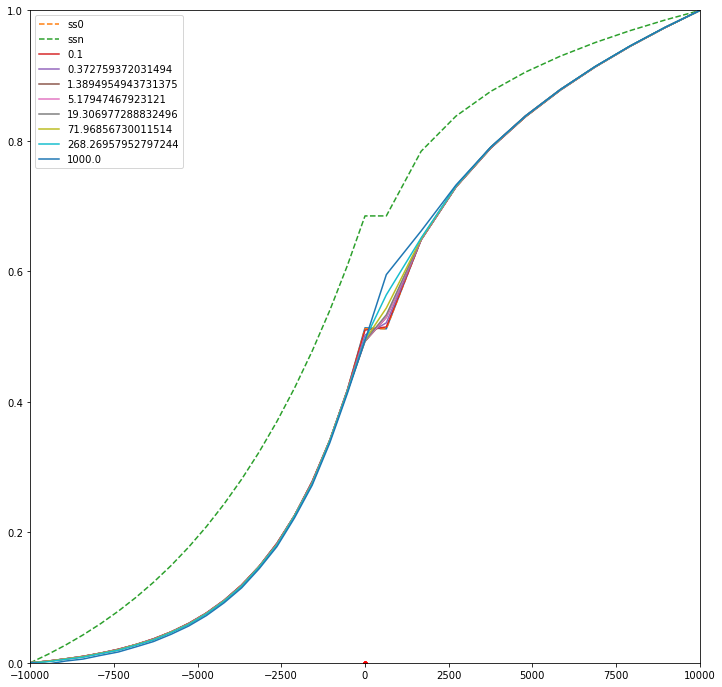

In [44]:
x = np.linspace(0,L,20)
r = np.linspace(a,R,10)

ax = np.append(-x[::-1], r)
res = np.append(sol_x(x,0)[::-1], sol_r(r,0))
s0 = np.append(ssx0(x)[::-1], ssr0(r))
sn = np.append(ssx(x)[::-1], ssr(r))

plt.figure(figsize=(12,12))
plt.plot(ax, res)
plt.plot(ax, s0, '--', label='ss0')
plt.plot(ax, sn, '--', label='ssn')
for t in np.logspace(-1,3,8):
    print(t)
    xsol = sol_x(x,t)[::-1]
    print('xsol done')
    rsol = sol_r(r,t)
    print('rsol done')
    res = np.append(xsol, rsol)
    plt.plot(ax, res, label=str(t))
    plt.plot(0, g(t), 'r.')
plt.xlim(-L,R)
plt.ylim(0,1)
plt.legend()
plt.show()

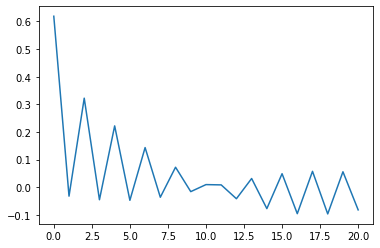

In [14]:
weights = [integrate.quad(lambda r: ssr0(r)*phi_r_n(r,n), a, R)[0] for n in range(N_r)]
rho = [integrate.quad(lambda r: phi_r_n(r,n)**2, a, R)[0] for n in range(N_r)]

p = np.array(weights)/ np.array(rho)

plt.figure()
plt.plot(p)
plt.show()

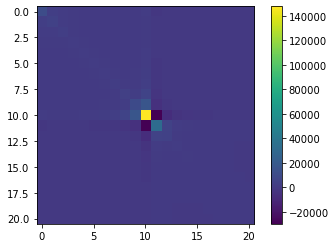

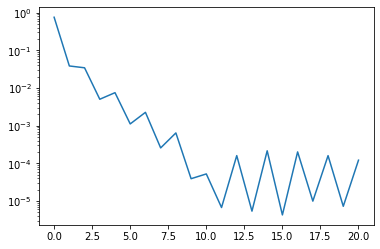

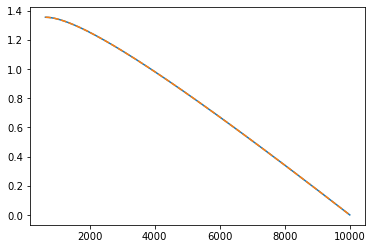

In [15]:
x = np.linspace(0,L,200)
r = np.linspace(a,R,200)

G_r = np.array([[inner_r(n,m) for n in range(N_r)] for m in range(N_r)])
plt.figure()
plt.imshow(G_r)
plt.colorbar()
plt.show()


w = np.linalg.inv(G_r) @ np.array([integrate.quad(lambda r: v(r)*phi_r_n(r,n), a, R)[0] for n in range(N_r)])

plt.figure()
plt.plot(np.abs(w))
plt.yscale('log')
plt.show()

def soltione(r):
    return w @ np.array([phi_r_n(r,n) for n in range(N_r)])

plt.figure()
plt.plot(r, v(r))
plt.plot(r, soltione(r), '--')
plt.show()

In [32]:
g0 = g(0)

tempix1 = [sum([inv_x[n,j]*integrate.quad(lambda x: ssx0(x)*phi_x_n(x,j), 0, L)[0] for j in range(N_x)]) for n in range(N_x)]
tempix2 = [sum([inv_x[n,j]*integrate.quad(lambda x: (L-x)*phi_x_n(x,j), 0, L)[0] for j in range(N_x)]) for n in range(N_x)]
tempix3 = [sum([inv_x[n,j]*integrate.quad(lambda x: (Q/A)*phi_x_n(x,j), 0, L)[0] for j in range(N_x)]) for n in range(N_x)]

tempir1 = [sum([inv_r[n,j]*integrate.quad(lambda r: ssr0(r)*phi_r_n(r,j), a, R)[0] for j in range(N_r)]) for n in range(N_r)]
tempir2 = [sum([inv_r[n,j]*integrate.quad(lambda r: (R-r)*phi_r_n(r,j), a, R)[0] for j in range(N_r)]) for n in range(N_r)]
tempir3 = [sum([inv_r[n,j]*integrate.quad(lambda r: (kappa-Q/(pi*D))/r*phi_r_n(r,j), a, R)[0] for j in range(N_r)]) for n in range(N_r)]

I0 = np.array([(tempix1[n] -g0*tempix2[n])*phi_x_n(0,n) for n in range(N_x)])
I1 = np.array([tempix2[n]*phi_x_n(0,n) for n in range(N_x)])
I2 = np.array([(tempix3[n] -labda_x[n]*tempix2[n])*phi_x_n(0,n) for n in range(N_x)])

P0 = np.array([(tempir1[n] -g0*tempir2[n])*phi_r_n(a,n) for n in range(N_r)])
P1 = np.array([tempir2[n]*phi_r_n(a,n) for n in range(N_r)])
P2 = np.array([(tempir3[n] -labda_r[n]*tempir2[n])*phi_r_n(a,n) for n in range(N_r)])

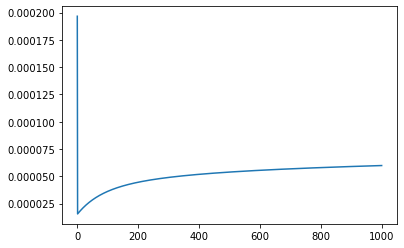

In [39]:
def trapx(ti, garr, tarr):
    res = 0
    if len(tarr)<3:
        return 0
    for n in range(N_x):
        for i in range(1,len(tarr)-1):
            res += garr[i]*np.exp(labda_x[n]*(tarr[i]-ti))
        res = res*I2[n]
    return dt*res

def trapr(ti, garr, tarr):
    res = 0
    if len(tarr)<3:
        return 0
    for n in range(N_r):
        for i in range(1,len(tarr)-1):
            res += garr[i]*np.exp(labda_r[n]*(tarr[i]-ti))
        res = res*P2[n]
    return dt*res

def dem(ti):
    res = a-R-L
    res += np.sum(-(1+np.exp(-labda_x*ti))*I1 - dt/2*I2)
    res += np.sum((1+np.exp(-labda_r*ti))*P1 + dt/2*P2)
    return res

def num(ti, garr, tarr):
    res = -1
    res += np.sum(np.exp(-labda_x*ti)*I0 + dt/2*np.exp(-labda_x*ti)*I2)
    res += trapx(ti, garr, tarr)
    res += -np.sum(np.exp(-labda_r*ti)*P0 + dt/2*np.exp(-labda_r*ti)*P2)
    res += -trapr(ti, garr, tarr)
    return res

garr = np.array([g0])
tarr = np.array([0])
dt = 1
M = 1000

for i in range(M):
    ti = tarr[-1]+dt
    g_new = num(ti, garr, tarr)/dem(ti)
    garr = np.append(garr, np.array([g_new]))
    tarr = np.append(tarr, np.array([ti]))

plt.figure()
plt.plot(tarr, garr)
plt.show()

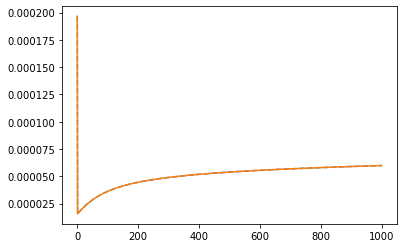

In [40]:
from scipy.interpolate import CubicSpline

cs = CubicSpline(tarr, garr)

plt.figure()
plt.plot(tarr, garr, '--')
plt.plot(tarr, cs(tarr))
plt.show()

In [41]:
def g(t):
    return cs(t)

def g_prime(t):
    dt = 1e-3
    return (cs(t+dt)-cs(t))/dt